<a href="https://colab.research.google.com/github/diamondgelato/learning-ML/blob/main/FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer    

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Final Assignment

Problem Statement : Predict whether the income of the individual is above or below 50 K

\>50K - To be treated as "0" <br>
<=50K - To be treated as "1"

Data : There are 2 sets of files

Training : assignment_train.csv <br>
Test : assignment_test.csv

Method : You will need to create your model based on the training data set and provide your predictions in the test data set. Expectation is to build best model based on the algorithms that we have learned so far and provide predicted values using each of the algorithm. In the test file you will see columns to store your predictions based on the algorithm used

- Income_knn <br>
- Income_lr <br>
- Income_dt <br>
- Income_rf

You will have to populate these columns and upload your file into Assignment - 5 folder. The file naming convention should be <rollno>_<firstname>_<lastname>.csv

Note: <br>
- The submission file naming convention should be as defined above <br>
- The submission file content i.e. columns should match exactly as per the test file provided <br>
- Any deviation from the above will not be considered and your submission might fail <br>

Last Date for Submission : 22-Oct-2020

# Data Preprocessing

In [ ]:
filepath = r'assignment_train.csv'
testfile = r'assignment_test.csv'

data = pd.read_csv (filepath)
testdata = pd.read_csv (testfile)

preX = data.drop (columns = 'Income', axis = 1)
y = data['Income']

X_topred = testdata.drop (columns = ['Income_knn', 'Income_lr', 'Income_dt', 'Income_rf'])

data.describe ()

,first,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,41516.000000,41516.000000,4.151600e+04,41516.000000,41516.000000,41516.000000,41516.000000
mean,24396.564939,38.611668,1.894621e+05,10.077127,1087.926534,87.618147,40.403074
std,14099.873433,13.700998,1.055313e+05,2.573955,7561.167426,402.840377,12.385923
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,12205.750000,28.000000,1.174590e+05,9.000000,0.000000,0.000000,40.000000
50%,24360.500000,37.000000,1.781070e+05,10.000000,0.000000,0.000000,40.000000
75%,36635.250000,48.000000,2.376110e+05,12.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
testdata.tail(15)

,first,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income_knn,Income_lr,Income_dt,Income_rf
7311,48758,35,Private,238980,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,NaN,NaN,NaN,NaN
7312,48762,43,Self-emp-not-inc,241055,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,NaN,NaN,NaN,NaN
7313,48771,24,Private,205883,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,NaN,NaN,NaN,NaN
7314,48773,23,Private,113735,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,20,United-States,NaN,NaN,NaN,NaN
7315,48776,41,Private,160785,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,NaN,NaN,NaN,NaN
7316,48777,18,Private,86150,HS-grad,9,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Female,0,0,15,United-States,NaN,NaN,NaN,NaN
7317,48781,56,Self-emp-not-inc,254711,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,NaN,NaN,NaN,NaN
7318,48788,28,Private,109001,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,NaN,NaN,NaN,NaN
7319,48800,73,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,NaN,NaN,NaN,NaN
7320,48810,31,Private,112115,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,NaN,NaN,NaN,NaN


In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41516 entries, 0 to 41515
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   first           41516 non-null  int64 
 1   age             41516 non-null  int64 
 2   workclass       41516 non-null  object
 3   fnlwgt          41516 non-null  int64 
 4   education       41516 non-null  object
 5   education-num   41516 non-null  int64 
 6   marital-status  41516 non-null  object
 7   occupation      41516 non-null  object
 8   relationship    41516 non-null  object
 9   race            41516 non-null  object
 10  sex             41516 non-null  object
 11  capital-gain    41516 non-null  int64 
 12  capital-loss    41516 non-null  int64 
 13  hours-per-week  41516 non-null  int64 
 14  native-country  41516 non-null  object
 15  Income          41516 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.1+ MB


In [ ]:
for i in range(0,41516):
    if ((y[i] == ' <=50K') or (y[i]  == ' <=50K.')):
        y[i] = 0
    elif ((y[i] == ' >50K') or (y[i]  == ' >50K.')):
        y[i] = 1

y = y.astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
educationClasses = preX['education'].unique()
maritalClasses = preX['marital-status'].unique()
occupationClasses = preX['occupation'].unique()
workClasses = preX['workclass'].unique()
relationClasses = preX['relationship'].unique()
raceClasses = preX['race'].unique()
sexClasses = preX['sex'].unique()
countryClasses = preX['native-country'].unique()

print (educationClasses)
print (maritalClasses)
print (occupationClasses)
print (workClasses)
print (relationClasses)
print (raceClasses)
print (sexClasses)
print (countryClasses)

[' Assoc-voc' ' Some-college' ' HS-grad' ' 10th' ' Bachelors'
 ' Prof-school' ' Masters' ' 12th' ' 7th-8th' ' 11th' ' Assoc-acdm'
 ' Doctorate' ' 1st-4th' ' 9th' ' 5th-6th' ' Preschool']
[' Married-civ-spouse' ' Never-married' ' Divorced' ' Widowed'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
[' Tech-support' ' Adm-clerical' ' Exec-managerial' ' Farming-fishing'
 ' ?' ' Prof-specialty' ' Other-service' ' Craft-repair' ' Sales'
 ' Transport-moving' ' Machine-op-inspct' ' Protective-serv'
 ' Priv-house-serv' ' Handlers-cleaners' ' Armed-Forces']
[' Private' ' Self-emp-inc' ' ?' ' Local-gov' ' State-gov'
 ' Self-emp-not-inc' ' Federal-gov' ' Without-pay' ' Never-worked']
[' Husband' ' Other-relative' ' Unmarried' ' Wife' ' Not-in-family'
 ' Own-child']
[' White' ' Black' ' Other' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo']
[' Male' ' Female']
[' United-States' ' Cuba' ' Dominican-Republic' ' Taiwan' ' Philippines'
 ' Greece' ' England' ' Mexico' ' Puerto-Rico' ' Hungary'

In [ ]:
preX.drop (columns = ['first', 'fnlwgt'], inplace = True)
X_topred.drop (columns = ['first', 'fnlwgt'], inplace = True)

preX.head ()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,48,Private,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
1,35,Private,Some-college,10,Never-married,Adm-clerical,Other-relative,Black,Female,0,0,40,United-States
2,65,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
3,45,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,38,United-States
4,57,Self-emp-inc,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,60,United-States


In [ ]:
y = y[preX['workclass'] !=' ?']
preX = preX[preX['workclass'] !=' ?']
# X_topred = X_topred[X_topred['workclass'] != '?']

preX.head ()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,48,Private,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
1,35,Private,Some-college,10,Never-married,Adm-clerical,Other-relative,Black,Female,0,0,40,United-States
2,65,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
3,45,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,38,United-States
4,57,Self-emp-inc,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,60,United-States


In [ ]:
le = LabelEncoder()
X = preX

le.fit (workClasses)
X['workclass'] = le.transform (preX['workclass']).astype('int')
le.fit (educationClasses)
X['education'] = le.transform (preX['education']).astype('int')
le.fit (maritalClasses)
X['marital-status'] = le.transform (preX['marital-status']).astype('int')
le.fit (occupationClasses)
X['occupation'] = le.transform (preX['occupation']).astype('int')
le.fit (relationClasses)
X['relationship'] = le.transform (preX['relationship']).astype('int')
le.fit (raceClasses)
X['race'] = le.transform (preX['race']).astype('int')
le.fit (sexClasses)
X['sex'] = le.transform (preX['sex']).astype('int')
le.fit (countryClasses)
X['native-country'] = le.transform (preX['native-country']).astype('int')

le.fit (workClasses)
X_topred['workclass'] = le.transform (X_topred['workclass']).astype('int')
le.fit (educationClasses)
X_topred['education'] = le.transform (X_topred['education']).astype('int')
le.fit (maritalClasses)
X_topred['marital-status'] = le.transform (X_topred['marital-status']).astype('int')
le.fit (occupationClasses)
X_topred['occupation'] = le.transform (X_topred['occupation']).astype('int')
le.fit (relationClasses)
X_topred['relationship'] = le.transform (X_topred['relationship']).astype('int')
le.fit (raceClasses)
X_topred['race'] = le.transform (X_topred['race']).astype('int')
le.fit (sexClasses)
X_topred['sex'] = le.transform (X_topred['sex']).astype('int')
le.fit (countryClasses)
X_topred['native-country'] = le.transform (X_topred['native-country']).astype('int')

# X_topred.head (10)
X_topred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             7326 non-null   int64
 1   workclass       7326 non-null   int64
 2   education       7326 non-null   int64
 3   education-num   7326 non-null   int64
 4   marital-status  7326 non-null   int64
 5   occupation      7326 non-null   int64
 6   relationship    7326 non-null   int64
 7   race            7326 non-null   int64
 8   sex             7326 non-null   int64
 9   capital-gain    7326 non-null   int64
 10  capital-loss    7326 non-null   int64
 11  hours-per-week  7326 non-null   int64
 12  native-country  7326 non-null   int64
dtypes: int64(13)
memory usage: 744.2 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
X_train, X_cv, y_train, y_cv = train_test_split (X_train, y_train, test_size = 0.25)

# Logistic Regression

In [ ]:
c = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
lr_best_score = 0
lr_best_features = {'C': 1}

for tempC in c:
  print (tempC)
  lr = LogisticRegression (C = tempC, max_iter = 1000)

  lr.fit (X_train, y_train) 

  lr_test_score = lr.score (X_cv, y_cv)
  lr_train_score = lr.score (X_train, y_train)

  if lr_test_score > lr_best_score:
    lr_best_score = lr_test_score
    lr_best_features = {'C': tempC}

print ("\nBest score: ", lr_best_score)
print ("Best parameters: ", lr_best_features)

0.01


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.03


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


30

Best score:  0.8209126933401508
Best parameters:  {'C': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr = LogisticRegression (C = 0.1, max_iter = 4000)
lr.fit (X_train, y_train) 

print ("Test Score: ", lr.score (X_test, y_test))
print ("Train Score: ", lr.score (X_train, y_train))

Test Score:  0.8143934551962163
Train Score:  0.8215716355578283


# K-Nearest Neighbours
What to test on the cross-validation set:
- Different number of neighbours (n_neigbours)

In [ ]:
scores = []
neighbours = range (1,16)

for num in neighbours:
    knn = KNeighborsClassifier (n_neighbors = num)
    knn.fit (X_train, y_train)
    scores.append (knn.score (X_cv, y_cv))

print (neighbours)
print (scores)

range(1, 16)
[0.8050619966764668, 0.8238527419148665, 0.8258979930972773, 0.833567685031318, 0.8324172312412118, 0.8365077336060335, 0.8348459670203247, 0.838297328390643, 0.8376581873961396, 0.8372747027994376, 0.8356129362137288, 0.837530359197239, 0.8345903106225233, 0.8367633900038348, 0.8358685926115301]


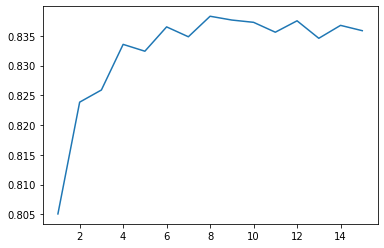

In [ ]:
pyplot.plot (neighbours, scores)

# Since first max is at 6, number of neighbours = 6

In [ ]:
knn = KNeighborsClassifier (n_neighbors = 6)
knn.fit (X_train, y_train)
print ("Test accuracy: ", knn.score (X_test, y_test))

Test accuracy:  0.829988495462099


# Decision Trees

In [ ]:
# Grid Search
best_score = 0

for depth in range (2, 10):
  for split in range (2, 5):
    for leaf in range (5, 20):
      for criteria in ['gini', 'entropy']:
        tree_grid_search = DecisionTreeClassifier (criterion = criteria, max_depth = depth, max_leaf_nodes = leaf, min_samples_split = split)

        tree_grid_search.fit (X_train, y_train) 

        test_score = tree_grid_search.score (X_cv, y_cv)
        train_score = tree_grid_search.score (X_train, y_train)

        if test_score > best_score:
          best_score = test_score
          best_features = {'depth': depth, 'split': split, 'leaves': leaf, 'criterion': criteria}

        # print ({'depth': depth, 'split': split, 'leaves': leaf, 'criterion': criteria, 'score': test_score})

print ("\nBest score: ", best_score)
print ("Best parameters: ", best_features)


Best score:  0.8457113639268823
Best parameters:  {'depth': 6, 'split': 2, 'leaves': 19, 'criterion': 'gini'}


In [ ]:
best_features =  {'depth': 6, 'split': 2, 'leaves': 19, 'criterion': 'gini'}

dt = DecisionTreeClassifier (criterion = best_features['criterion'], max_depth = best_features['depth'], 
                             max_leaf_nodes = best_features['leaves'], min_samples_split = best_features['split'])

dt.fit (X_train, y_train)
print ("Test Score: ", dt.score (X_test, y_test))

Test Score:  0.8381695001917423


# Random Forests

In [ ]:
# Grid Search
best_score = 0

for depth in range (2, 10):
  for split in range (2, 5):
    for leaf in range (5, 20):
      for trees in range (10, 110, 10):
        for criteria in ['gini', 'entropy']:
          tree_grid_search = RandomForestClassifier (n_estimators = trees, criterion = criteria, max_depth = depth,
                                                     max_leaf_nodes = leaf, min_samples_split = split)
 
          tree_grid_search.fit (X_train, y_train) 

          test_score = tree_grid_search.score (X_cv, y_cv)
          train_score = tree_grid_search.score (X_train, y_train)

          if test_score > best_score:
            best_score = test_score
            best_features = {'depth': depth, 'split': split, 'leaves': leaf, 'criterion': criteria, 'number': trees}

          print (test_score)
          print ({'depth': depth, 'split': split, 'leaves': leaf, 'criterion': criteria, 'number': trees})

          # print ({'depth': depth, 'split': split, 'leaves': leaf, 'criterion': criteria, 'score': test_score})

print ("\nBest score: ", best_score)
print ("Best parameters: ", best_features)

Streaming output truncated to the last 5000 lines.
0.8425156589543653
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'gini', 'number': 20}
0.8394477821807491
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'entropy', 'number': 20}
0.8399590949763518
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'gini', 'number': 30}
0.8413652051642593
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'entropy', 'number': 30}
0.8407260641697558
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'gini', 'number': 40}
0.8409817205675572
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'entropy', 'number': 40}
0.8425156589543653
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'gini', 'number': 50}
0.8416208615620606
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'entropy', 'number': 50}
0.8439217691422728
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'gini', 'number': 60}
0.8399590949763518
{'depth': 7, 'split': 2, 'leaves': 15, 'criterion': 'entropy', 'number': 60}
0.84

In [ ]:
best_features = {'depth': 6, 'split': 3, 'leaves': 15, 'criterion': 'entropy', 'number': 20}
randomforest = RandomForestClassifier (criterion = best_features['criterion'], n_estimators = best_features['number'], 
                                           max_leaf_nodes = best_features['leaves'], max_depth = best_features['depth'],
                                           min_samples_split = best_features['split'])
randomforest.fit (X_train, y_train)
randomforest.score (X_cv, y_cv)

0.8455835357279816

# Final Predictions

In [ ]:
lr_pred = lr.predict (X_topred)
knn_pred = knn.predict (X_topred)
dt_pred = dt.predict (X_topred)
rf_pred = randomforest.predict (X_topred)

print (lr_pred.size, knn_pred.size, dt_pred.size, rf_pred.size)
# X_topred.info()

7326 7326 7326 7326


In [ ]:
results = open('Results.csv', mode = 'a')
# i = 10
# res = (str)(knn_pred[i]) + "," + (str)(lr_pred[i]) + "," + (str)(dt_pred[i]) + "," + (str)(rf_pred[i]) + "\n"
# print(res)

for i in range(0, (X_topred.size-1)):
  res = "\n" + (str)(knn_pred[i]) + "," + (str)(lr_pred[i]) + "," + (str)(dt_pred[i]) + "," + (str)(rf_pred[i])
  results.write (res)
  if (i % 200 == 0):
    print(res)


1,1,1,1

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

1,1,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

1,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

0,0,0,0

1,1,1,1

0,0,0,0

0,0,0,0

0,0,0,0

1,0,1,1

0,0,0,0

0,0,0,0

1,1,1,1

0,0,0,0


IndexError: ignored